In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#import models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate

In [2]:
datas = '/Users/pkrok/OneDrive/Python/Giannakopoulos/MyData.xlsx'

In [3]:
pd.set_option("display.max_columns", None)
df=pd.read_excel(datas)
df.head(2)
#df = df.dropna()

,type,cell,aperture,aperture2,ExpansionRatio,M-N,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_charge,apertureAtom_σ,apertureAtom_e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge,gas,mass,Dbulk,ascentricF,size - van der Waals (Å),size - kinetic diameter (Å),diffusivity,solubility,permeability,Unnamed: 37,Unnamed: 38,Unnamed: 39,aperture2.1,Dresults,number of modifications
0,CdIF-1,1.8077,3.92,3.93,1.002551,2.18,2.257,45354.6,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,He,4.002,0.000121,-0.390,2.66,2.60,6.000000e-08,NaN,NaN,NaN,NaN,NaN,627.0,596.0,72.0
1,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.6,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,H2,2.010,0.000108,-0.217,2.76,2.89,5.000000e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Keep only the columns I need

In [4]:
df=df[['type', 'aperture', 'ionicRad', 'linker_length1', 'linker_length2', 'linker_length3', 'func1_length', 'func2_length', 'func3_length', 'func1_mass', 'func2_mass', 'func3_mass', 'apertureAtom_σ', 'apertureAtom_e', 'linker_mass1', 'linker_mass2', 'linker_mass3' ]]
df.head()

,type,aperture,ionicRad,linker_length1,linker_length2,linker_length3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,apertureAtom_σ,apertureAtom_e,linker_mass1,linker_mass2,linker_mass3
0,CdIF-1,3.92,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0
1,CdIF-1,3.92,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0
2,CdIF-1,3.92,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0
3,CdIF-1,3.92,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0
4,CdIF-1,3.92,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0


# Get a first correlation of ionic radius with aperture

In [5]:
df[['aperture','ionicRad']].corr(method="spearman")

,aperture,ionicRad
aperture,1.000000,0.195191
ionicRad,0.195191,1.000000


# An overall correlation (ionic radius, linker length and functional group length)

In [6]:
# df.corr("pearson")['aperture'].abs().sort_values(ascending=False).head(10)

In [7]:
# df.corr("spearman")['aperture'].abs().sort_values(ascending=False).head(10)

In [8]:
# df.corr("kendall")['aperture'].abs().sort_values(ascending=False).head(10)

In [9]:
# from scipy.stats import pearsonr
# import pandas as pd

# def calculate_pvalues(df):
#     df = df.dropna()._get_numeric_data()
#     dfcols = pd.DataFrame(columns=df.columns)
#     pvalues = dfcols.transpose().join(dfcols, how='outer')
#     for r in df.columns:
#         for c in df.columns:
#             pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
#     return pvalues

# calculate_pvalues(df)

In [10]:
# from scipy.stats import kendalltau, pearsonr, spearmanr

# def kendall_pval(x,y):
#         return kendalltau(x,y)[1]
    
# def pearsonr_pval(x,y):
#         return pearsonr(x,y)[1]
    
# def spearmanr_pval(x,y):
#         return spearmanr(x,y)[1]

In [11]:
# df.corr(method=pearsonr_pval)['aperture']

In [12]:
# df.corr(method=spearmanr_pval)['aperture']

In [13]:
# df.corr(method=kendall_pval)['aperture']

# Bring my data into shape

In [14]:
df2=df.drop_duplicates(subset=['type'], keep='first')
df2

,type,aperture,ionicRad,linker_length1,linker_length2,linker_length3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,apertureAtom_σ,apertureAtom_e,linker_mass1,linker_mass2,linker_mass3
0,CdIF-1,3.92000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000
11,ZIF-8,3.46000,74,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000
23,ZIF-Cu,3.20000,71,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000
34,ZIF-67,3.32000,72,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000
45,BeIF-1,2.88000,41,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,dIm_Be,2.75316,41,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906
805,dIm_Co,2.91071,72,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906
817,dIm_Cu,2.89378,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906
829,dIm_Cd,2.99000,92,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906


In [15]:
df2=df2.rename(columns={'linker_length3':'linker3', 'func3_length':'func3G', 'linker_length2':'linker2', 'func2_length':'func2G', 'linker_length1':'linker1', 'func1_length':'func1G', 'apertureAtom_σ':'σ', 'apertureAtom_e':'e', 'linker_mass1.1':'linker_mass2' })

# I sort my data

In [16]:
df3=df2.sort_values(by = ['linker1', 'func1G', 'ionicRad'], ascending = True)
#df3.reset_index(drop=True)
df3

,type,aperture,ionicRad,linker1,linker2,linker3,func1G,func2G,func3G,func1_mass,func2_mass,func3_mass,σ,e,linker_mass1,linker_mass2,linker_mass3
265,tetr-ZIF8_Be,3.39000,41,3.66,3.66,3.66,3.780,3.780,3.780,15.0,15.0,15.0,0.325,0.7112,83.000,83.000,83.000
517,tetr-ZIF8_Cu,3.60000,71,3.66,3.66,3.66,3.780,3.780,3.780,15.0,15.0,15.0,0.325,0.7112,83.000,83.000,83.000
277,tetr-ZIF8_Co,3.77000,72,3.66,3.66,3.66,3.780,3.780,3.780,15.0,15.0,15.0,0.325,0.7112,83.000,83.000,83.000
253,tetr-ZIF8,3.81000,74,3.66,3.66,3.66,3.780,3.780,3.780,15.0,15.0,15.0,0.325,0.7112,83.000,83.000,83.000
409,NH2_tetrz_Be,3.02200,41,3.66,3.66,3.66,3.927,3.927,3.927,16.0,16.0,16.0,0.325,0.7112,83.000,83.000,83.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,dIm_Cu,2.89378,71,6.41,6.41,6.41,3.780,3.780,3.780,15.0,15.0,15.0,0.340,1.2552,134.906,134.906,134.906
841,dIm_Mg,2.95000,71,6.41,6.41,6.41,3.780,3.780,3.780,15.0,15.0,15.0,0.340,1.2552,134.906,134.906,134.906
805,dIm_Co,2.91071,72,6.41,6.41,6.41,3.780,3.780,3.780,15.0,15.0,15.0,0.340,1.2552,134.906,134.906,134.906
565,dIm_Zn,2.90000,74,6.41,6.41,6.41,3.780,3.780,3.780,15.0,15.0,15.0,0.367,2.4267,317.800,317.800,317.800


In [17]:
df3=df3.reset_index(drop=True)
df3

,type,aperture,ionicRad,linker1,linker2,linker3,func1G,func2G,func3G,func1_mass,func2_mass,func3_mass,σ,e,linker_mass1,linker_mass2,linker_mass3
0,tetr-ZIF8_Be,3.39000,41,3.66,3.66,3.66,3.780,3.780,3.780,15.0,15.0,15.0,0.325,0.7112,83.000,83.000,83.000
1,tetr-ZIF8_Cu,3.60000,71,3.66,3.66,3.66,3.780,3.780,3.780,15.0,15.0,15.0,0.325,0.7112,83.000,83.000,83.000
2,tetr-ZIF8_Co,3.77000,72,3.66,3.66,3.66,3.780,3.780,3.780,15.0,15.0,15.0,0.325,0.7112,83.000,83.000,83.000
3,tetr-ZIF8,3.81000,74,3.66,3.66,3.66,3.780,3.780,3.780,15.0,15.0,15.0,0.325,0.7112,83.000,83.000,83.000
4,NH2_tetrz_Be,3.02200,41,3.66,3.66,3.66,3.927,3.927,3.927,16.0,16.0,16.0,0.325,0.7112,83.000,83.000,83.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,dIm_Cu,2.89378,71,6.41,6.41,6.41,3.780,3.780,3.780,15.0,15.0,15.0,0.340,1.2552,134.906,134.906,134.906
68,dIm_Mg,2.95000,71,6.41,6.41,6.41,3.780,3.780,3.780,15.0,15.0,15.0,0.340,1.2552,134.906,134.906,134.906
69,dIm_Co,2.91071,72,6.41,6.41,6.41,3.780,3.780,3.780,15.0,15.0,15.0,0.340,1.2552,134.906,134.906,134.906
70,dIm_Zn,2.90000,74,6.41,6.41,6.41,3.780,3.780,3.780,15.0,15.0,15.0,0.367,2.4267,317.800,317.800,317.800


# With repeated splits

In [18]:
x = np.asanyarray(df3[['ionicRad', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e']])
y = np.asanyarray(df3[['aperture']])

x1 = (df3[['ionicRad', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e']])
y1 = (df3[['aperture']])

## K-fold Cross-Validation

In [19]:
from sklearn.model_selection import KFold

In [20]:
#kfold = model_selection.KFold(n_splits=10, random_state=None)
regr = linear_model.LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
results_kfold = model_selection.cross_val_score(regr, x, y, cv=kfold, scoring='neg_mean_squared_error')
MaxError = model_selection.cross_val_score(regr, x, y, cv=kfold, scoring='max_error')
R2 = model_selection.cross_val_score(regr, x, y, cv=kfold, scoring='r2')
print("negative MSE: %.1f" % (results_kfold.mean()))
print("Maximum error: %.3f" % (MaxError.mean()))
print("R2: %.3f" % (R2.mean()))
print("All values: %s" % (str(results_kfold)))

negative MSE: -0.0
Maximum error: -0.373
R2: 0.843
All values: [-0.00814737 -0.01561925 -0.14803125 -0.02828461 -0.04614581 -0.02519387
 -0.03376663 -0.02479546 -0.020951   -0.02465001]


## Shuffle Split

In [21]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
results_shuffle = model_selection.cross_val_score(regr, x, y, cv=cv, scoring='neg_mean_squared_error')
MaxError = model_selection.cross_val_score(regr, x, y, cv=cv, scoring='max_error')
R2 = model_selection.cross_val_score(regr, x, y, cv=cv, scoring='r2')
print("negative MSE: %.1f" % (results_shuffle.mean()))
print("Maximum error: %.3f" % (MaxError.mean()))
print("R2: %.3f" % (R2.mean()))
print("All values: %s" % (str(results_shuffle)))

negative MSE: -0.0
Maximum error: -0.553
R2: 0.888
All values: [-0.08923543 -0.01761494 -0.02759704 -0.0222338  -0.02324852 -0.05754144
 -0.03017    -0.06355062 -0.02775512 -0.02314411]


## Decision Tree Regressor with K-fold Cross-Validation

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=1)
from sklearn import metrics

In [23]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
results_kfold = model_selection.cross_val_score(tree, x, y, cv=kfold, scoring='neg_mean_squared_error')
MaxError = model_selection.cross_val_score(tree, x, y, cv=kfold, scoring='max_error')
R2 = model_selection.cross_val_score(tree, x, y, cv=kfold, scoring='r2')
print("negative MSE: %.3f" % (results_kfold.mean()))
print("Maximum error: %.3f" % (MaxError.mean()))
print("R2: %.3f" % (R2.mean()))
print("All values: %s" % (str(results_kfold)))

negative MSE: -0.042
Maximum error: -0.392
R2: 0.864
All values: [-0.04071634 -0.00686604 -0.0568477  -0.01234486 -0.05831676 -0.05541872
 -0.02956879 -0.0419294  -0.05348121 -0.06270982]


# Neural Network Regressor with K-fold Cross-Validation

In [24]:
NNregr = MLPRegressor(hidden_layer_sizes=(100), solver='lbfgs', random_state=1, max_iter=1600)

In [25]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
results_kfold = model_selection.cross_val_score(NNregr, x1, y1.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
MaxError = model_selection.cross_val_score(NNregr, x1, y1.values.ravel(), cv=kfold, scoring='max_error')
R2 = model_selection.cross_val_score(NNregr, x1, y1.values.ravel(), cv=kfold, scoring='r2')
print("negative MSE: %.3f" % (results_kfold.mean()))
print("Maximum error: %.3f" % (MaxError.mean()))
print("R2: %.3f" % (R2.mean()))
print("All values: %s" % (str(results_kfold)))

negative MSE: -0.519
Maximum error: -1.268
R2: -1.570
All values: [-0.05398711 -0.02483855 -2.82806721 -0.13516443 -0.34000827 -1.50170753
 -0.09600945 -0.09820034 -0.03609566 -0.07136546]


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5643)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=5643)

tree.fit(x_train, y_train)
y_tree=tree.predict(x_test)

regr.fit(x_train, y_train)
y_regr=regr.predict(x_test)

NNregr.fit(x1_train, y1_train.values.ravel())
y_NNregr=NNregr.predict(x1_test)

print('regression R2: %.4f' % (metrics.r2_score(y_test, y_regr)))
print('DT R2: %.4f' % (metrics.r2_score(y_test, y_tree)))
print('NN R2: %.4f' % (metrics.r2_score(y1_test, y_NNregr)))

regression R2: 0.9046
DT R2: 0.8646
NN R2: 0.6534


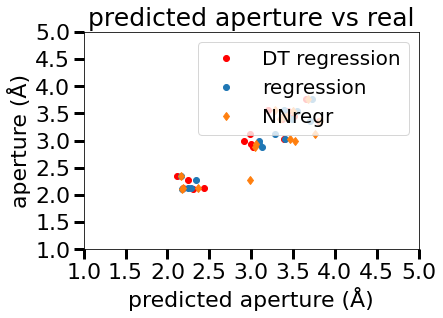

In [27]:
plt.plot(y_tree, y_test, 'ro', label='DT regression')
plt.plot(y_regr, y_test, 'o', label='regression')
plt.plot(y_NNregr, y1_test, 'd', label='NNregr')

plt.title ('predicted aperture vs real',fontsize=25)
plt.xlabel('predicted aperture (Å)', fontsize=22)
plt.ylabel('aperture (Å)',fontsize=22)
plt.legend(loc='upper right', fontsize=20)

plt.ylim(1, 5)
plt.xlim(1, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (11,9)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

In [28]:
x = np.asanyarray(df3[['ionicRad', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e']])
y = np.asanyarray(df3[['aperture']])

x1 = (df3[['ionicRad', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e']])
y1 = (df3[['aperture']])

In [29]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(max_depth=5,random_state=1)
# NNregr = MLPRegressor(hidden_layer_sizes=(60, 10, 20), solver='lbfgs', random_state=1, max_iter=6000)
RF = RandomForestRegressor(max_depth=5, random_state=1)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr, data_yhat_RF = list(), list(), list(), list(), list()
kfold = KFold(n_splits=40, shuffle=True, random_state=5)
# enumerate splits
for train_ix, test_ix in kfold.split(x):
    # get data
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    tree.fit(train_X, train_y)
    # NNregr.fit(train_X, train_y.ravel())
    regr.fit(train_X, train_y)
    RF.fit(train_X, train_y.ravel())
    
    # make predictions
    yhat_tree = tree.predict(test_X)
    yhat_regr = regr.predict(test_X)
    # yhat_NNregr = NNregr.predict(test_X)
    yhat_RF = RF.predict(test_X)

    # store
    data_y.extend(test_y)
    data_yhat_tree.extend(yhat_tree)
    data_yhat_regr.extend(yhat_regr)
    # data_yhat_NN.extend(yhat_NNregr)
    data_yhat_RF.extend(yhat_RF)
    
# evaluate the model

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

# R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
# Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
# Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
# EV_NN = (explained_variance_score(data_y, data_yhat_NN))
# Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
# MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))

R2_RF = (metrics.r2_score(data_y, data_yhat_RF))
Med_ABS_er_RF = (metrics.median_absolute_error(data_y, data_yhat_RF))
Max_error_RF = (metrics.max_error(data_y, data_yhat_RF))
EV_RF = (explained_variance_score(data_y, data_yhat_RF))
Mean_abs_perc_error_RF = (metrics.mean_absolute_percentage_error(data_y, data_yhat_RF))
MSE_RF = (metrics.mean_squared_error(data_y, data_yhat_RF))


# head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

# results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
#            ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
#            ["Neural Network", R2_NN, Med_ABS_er_NN, Max_error_NN, EV_NN, Mean_abs_perc_error_NN, MSE_NN],
#            ["Random Forest", R2_RF, Med_ABS_er_RF, Max_error_RF, EV_RF, Mean_abs_perc_error_RF, MSE_RF]]

head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Random Forest", R2_RF, Med_ABS_er_RF, Max_error_RF, EV_RF, Mean_abs_perc_error_RF, MSE_RF]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒═══════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤═══════╕
│ Model         │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │   MSE │
╞═══════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪═══════╡
│ Decision tree │ 0.918 │           0.081 │       0.539 │                0.918 │                 0.043 │ 0.031 │
├───────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────┤
│ Regression    │ 0.906 │           0.105 │       0.844 │                0.907 │                 0.046 │ 0.035 │
├───────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼───────┤
│ Random Forest │ 0.928 │           0.075 │       0.502 │                0.929 │                 0.041 │ 0.027 │
╘═══════════════╧═══════╧═════════════════╧═════════════╧══════════════════════╧════════════════

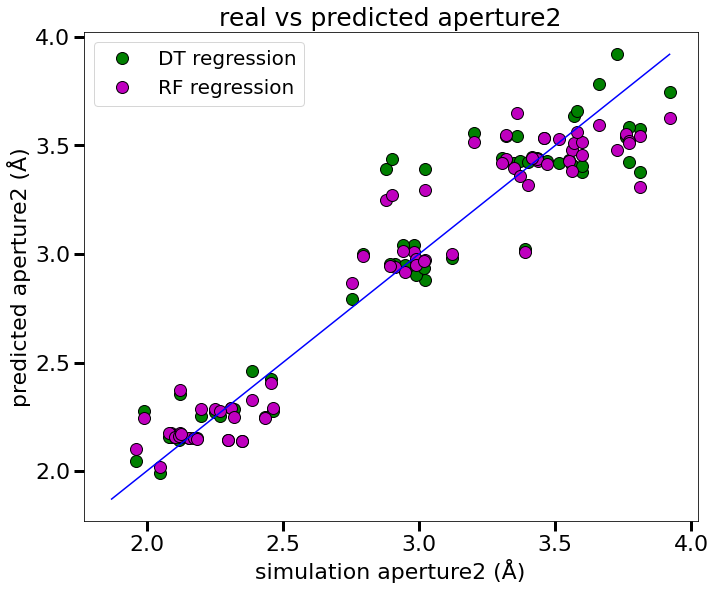

In [30]:
# plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='12', linewidth=3, markeredgecolor='k')
# plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_RF, 'o', label='RF regression', c='m', markersize='12', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted aperture2',fontsize=25)
plt.xlabel('simulation aperture2 (Å)', fontsize=22)
plt.ylabel('predicted aperture2 (Å)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.savefig('aperture_prediction_all.png', bbox_inches='tight', dpi=300, transparent=True )
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# tree=DecisionTreeRegressor(random_state=0, max_depth=5)
# regr = linear_model.LinearRegression()
# NNregr = MLPRegressor(hidden_layer_sizes=(200), solver='lbfgs', random_state=1, max_iter=2800)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr = list(), list(), list(), list()

# kfold = KFold(n_splits=45, shuffle=True, random_state = None)

for i in range(10):
    kfold = KFold(n_splits=30, shuffle=True, random_state = None)
    tree=DecisionTreeRegressor(random_state=None, max_depth=5)
    regr = linear_model.LinearRegression()
    NNregr = MLPRegressor(hidden_layer_sizes=(100), solver='lbfgs', random_state=None, max_iter=2800)
    # enumerate splits
    for train_ix, test_ix in kfold.split(x):
        # get data
        train_X, test_X = x[train_ix], x[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        # fit model
        tree.fit(train_X, train_y)
        regr.fit(train_X, train_y)
        NNregr.fit(train_X, train_y.ravel())
        
        # make predictions
        yhat_tree = tree.predict(test_X) 
        yhat_regr = regr.predict(test_X)
        yhat_NNregr = NNregr.predict(test_X)
        
        # store
        data_y.extend(test_y)
        data_yhat_tree.extend(yhat_tree)
        data_yhat_regr.extend(yhat_regr)
        data_yhat_NN.extend(yhat_NNregr)

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
EV_NN = (explained_variance_score(data_y, data_yhat_NN))
Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Neural Network", R2_NN, Med_ABS_er_NN, Max_error_NN, EV_NN, Mean_abs_perc_error_NN, MSE_NN]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

In [ ]:
plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted aperture',fontsize=25)
plt.xlabel('aperture (Å)', fontsize=22)
plt.ylabel('predicted aperture (Å)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(regr_yhat))
p2 = min(min(data_y), min(regr_yhat))
plt.plot([p1, p2], [p1, p2],'b-' )

plt.ylim(1.5, 5)
plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

In [ ]:
print('R2 for DT: %.3f' % (metrics.r2_score(data_y, DT_yhat)))

In [ ]:
print('R2 for DT: {:.2}'.format(metrics.r2_score(data_y, DT_yhat)))

In [ ]:
import mlxtend
from mlxtend.evaluate import paired_ttest_5x2cv

In [ ]:
tree=DecisionTreeRegressor(random_state=0, max_depth=3)
regr = linear_model.LinearRegression()

t, p = paired_ttest_5x2cv(estimator1=tree,
                          estimator2=regr,
                          X=x, y=y,
                          random_seed=None)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

In [ ]:
from mlxtend.evaluate import paired_ttest_kfold_cv

In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=tree,
                          estimator2=regr,
                          X=x, y=y,
                          random_seed=None)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)